In [1]:
import os
import pandas as pd
import yfinance as yf
import time
from datetime import datetime, timedelta

# ファイルパスを指定
file_path = 'ai_temp/'

# ファイル名を取得
file_names = os.listdir(file_path)

# CSVファイルのみを取得
csv_files = [f for f in file_names if f.endswith('.csv')]

In [2]:
csv_files

['2023-10-18.csv',
 '2023-10-19.csv',
 '2023-10-20.csv',
 '2023-10-23.csv',
 '2023-10-24.csv',
 '2023-10-25.csv',
 '2023-10-26.csv']

In [21]:
df = pd.read_csv(os.path.join(file_path, csv_files[-1]), header=0)

In [37]:
df1 = yf.download(list(df['name'][:50]), period="1mo")['Adj Close']

[*********************100%%**********************]  50 of 50 completed


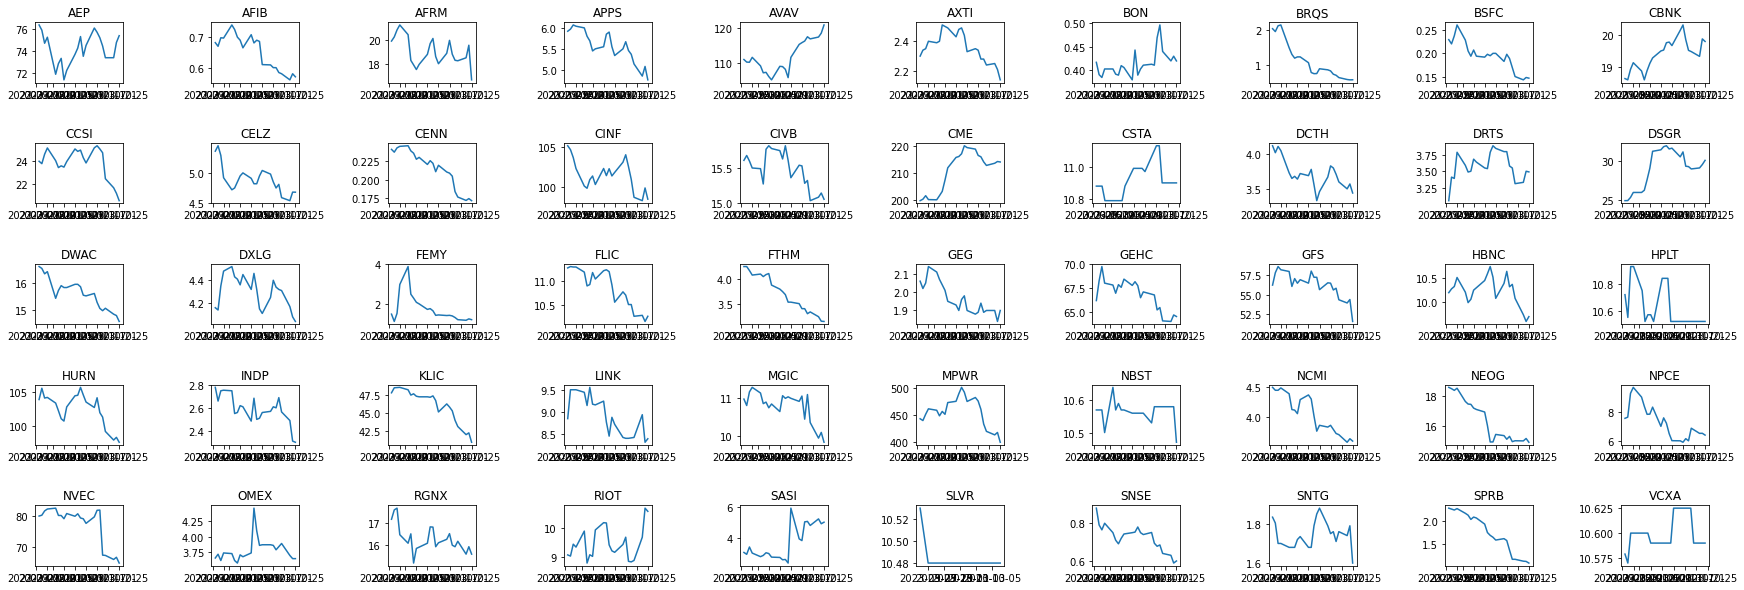

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=5, ncols=int(len(df1.columns) / 5), figsize=(30, 10))
# 軸間の水平および垂直のスペースを調整
plt.subplots_adjust(wspace=1.0, hspace=1.0)
for i, col in enumerate(df1.columns):
    row = i // (len(df1.columns) // 5)  # Calculate the row for the current column
    col_index = i % (len(df1.columns) // 5)  # Calculate the column index
    axs[row, col_index].plot(df1[col])
    axs[row, col_index].set_title(col)
plt.show()

In [6]:
result_list = []
end_limit_day = '2023-11-01'
res_df = pd.DataFrame(columns=['name', 'date', 'OPEN', 'CLOSE'])
for csv_file in csv_files:
    try:
        df = pd.read_csv(os.path.join(file_path, csv_file), header=0)
        # print(df['name'][0])
        # print(csv_file.split('.')[0])

        # 株式のシンボルを指定してyfinanceからデータを取得する
        ticker = yf.Ticker(df['name'][0])

        start_date = csv_file.split('.')[0]
        date_str = csv_file.split('.')[0]
        date_obj = datetime.strptime(date_str, '%Y-%m-%d')
        new_date_obj = date_obj + timedelta(days=1)
        end_date = new_date_obj.strftime('%Y-%m-%d')
        specific_data = ticker.history(start=start_date ,end=end_date)

        # print(float(specific_data['Close'][0]) / float(specific_data['Open'][0]))
        result_list.append(float(specific_data['Close'][0]) / float(specific_data['Open'][0]))
        res_df.loc[len(res_df)] = [df['name'][0], start_date, float(specific_data['Open'][0]), float(specific_data['Close'][0])]
        print(df['name'][0], start_date, float(specific_data['Close'][0]) / float(specific_data['Open'][0]))

        if end_limit_day and end_date >= end_limit_day:
            break
        
    except Exception as e:
        print(e)
        continue

    # time.sleep(2)

PCAR 2023-10-18 0.9898236825391953
GRAB 2023-10-19 1.003039510814348
GRAB 2023-10-20 1.0030674817461689
GRAB 2023-10-23 1.0124610471581545
GPRO 2023-10-24 0.9814126575268743


GEHC: Data doesn't exist for startDate = 1698292800, endDate = 1698379200


GPRO 2023-10-25 0.9961685858754068
index 0 is out of bounds for axis 0 with size 0


In [242]:
res_df.to_csv('result2.csv', index=False)

In [7]:
# リスト内の全要素を掛け合わせる
result_nums = []
result = 1
for num in result_list:
    result *= num
    result_nums.append(result)

# 結果を表示する
print(result)

0.9857546922394924


In [200]:
specific_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-31 00:00:00-04:00,2.57,3.46,2.57,3.3,2843900,0.0,0.0


[1.0253164308649139,
 0.8780488230372245,
 1.4520546781969808,
 0.9174311645664506,
 0.9805825422504354,
 0.9805825422504354,
 0.9801980384996437,
 1.059999942779541,
 1.1009174412262677,
 1.1249999751647324,
 0.9696969094902602,
 1.198412699914453,
 0.8807947359703692,
 1.2153846929764636,
 1.130434805143533,
 0.9285714332499719,
 1.0357143237274533,
 1.0292397375443723,
 1.0755813913193184,
 0.8650000254313152,
 0.9895833430346104,
 1.0106382877538516,
 0.9789473882342312]

1.8816698294111986


In [25]:
import csv

# CSVファイルに書き込む
with open('output.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for num in result_nums:
        writer.writerow([num])

In [27]:
import csv

# CSVファイルに書き込む
with open('output_2.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for num in result_list:
        writer.writerow([num])

In [45]:
# 株式のシンボルを指定してyfinanceからデータを取得する
msft = yf.Ticker("SANG")

# 特定の日時の株式データを取得する
# specific_date = '2022-01-05'
# specific_end_date = '2022-01-04'
specific_data = msft.history(start='2022-01-05' ,end='2022-01-06')

print(float(specific_data['Close'][0]) / float(specific_data['Open'][0]))

1.0430107122579966


In [14]:
base_df = pd.read_csv('../database/normaraze_stock_price/dataset_20231012.csv')

In [21]:
# 特定の文字列を含む行のインデックスを取得
indices = base_df[base_df['name'].str.contains(df['name'][0])].index

# 結果を表示
print(indices[0])

786


In [89]:
import csv

In [136]:
import yfinance as yf

In [201]:
money = 1
start_date_list = ['2023-09-14', '2023-09-15']
ticker_list =  [result_df.iloc[0]['name'], result_df.iloc[1]['name']]

print(result_df.iloc[1]['name'])

APA


In [202]:
for ticker, date in zip(ticker_list, start_date_list):
    money = caliculate_money(money, date, ticker)

                            Open  High    Low  Close  Volume  Dividends  \
Date                                                                      
2023-09-14 00:00:00-04:00  1.595  1.62  1.595   1.61    5900        0.0   

                           Stock Splits  
Date                                     
2023-09-14 00:00:00-04:00           0.0  
                                Open   High        Low      Close   Volume  \
Date                                                                         
2023-09-15 00:00:00-04:00  42.759998  43.25  42.040001  42.459999  9349600   

                           Dividends  Stock Splits  
Date                                                
2023-09-15 00:00:00-04:00        0.0           0.0  


In [205]:
print(f"結果は{money}, 増減としては{(money-1.)*100}%になります")

結果は1.0023225143844883, 増減としては0.23225143844882723%になります

